In [1]:
import skimage
import skimage.io
import os, sys
import utils
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

## Calculate the mean image and train data X

In [2]:
image_folder = os.path.join(os.getcwd(), "images")
files = utils.files_under_folder_with_suffix(image_folder, suffix = '.jpg')

In [ ]:
train_set = files[:800]

In [ ]:
mean_image, X = utils.X_mean_V_chanel(image_folder, train_set)

In [ ]:
mdict = {"mean_image": mean_image, "train_data": X}
scipy.io.savemat("PCA_Train_Data.mat", mdict)

## Read in the mean image and train data X

In [3]:
mdict = scipy.io.loadmat("PCA_Train_Data.mat")
mean_image = mdict["mean_image"]
X = mdict["train_data"]

In [4]:
X_center = X - mean_image

In [5]:
Pseudo_Cov_Matrix = np.matmul(X_center, np.transpose(X_center))

In [6]:
P_eigen_vector, P_engen_value, _ = np.linalg.svd(Pseudo_Cov_Matrix)

## Calculate first 50 eigen-faces

In [7]:
for i in range(50):
    if i == 0:
        cur_face = np.matmul(np.transpose(X_center), P_eigen_vector[:, i])
        eigen_face =  np.expand_dims(cur_face / np.sqrt(np.dot(cur_face, cur_face)), axis = 0)
    else:
        cur_face = np.matmul(np.transpose(X_center), P_eigen_vector[:, i])
        eigen_face = np.concatenate((eigen_face, np.expand_dims(cur_face / np.sqrt(np.dot(cur_face, cur_face)), axis = 0)), axis = 0)

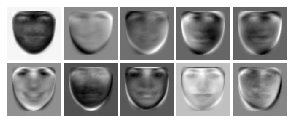

In [8]:
fig = utils.plot(eigen_face[:10, :], 2, 5, 1, 128, 128)
fig.savefig("1_10_eigen_faces.png")

## 10 Reconstructed Face

In [8]:
file = files[800:850]
X, X_re = utils.reconstruct_image(image_folder, file, mean_image, eigen_face)

In [ ]:
print(X.shape, X_re.shape)

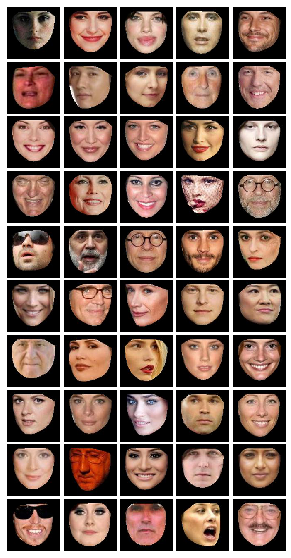

In [9]:
fig_org = utils.plot(X[:50], 10, 5, 3, 128, 128)
# fig_org.savefig("2_10_org_faces.png")

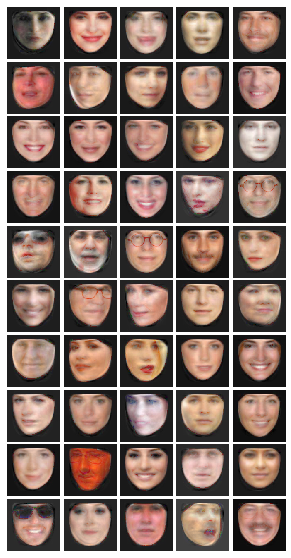

In [10]:
fig_re = utils.plot(X_re[:50], 10, 5, 3, 128, 128)
# fig_re.savefig("3_10_reconstructed_faces.png")

## Reconstructed Loss

In [9]:
K = [x for x in range(0, 55, 5)]
K[0] = 1
test_set = files[800:]

In [10]:
Loss = []
for k in K:
    loss = utils.reconstructed_loss(image_folder, test_set, mean_image, eigen_face[:k, :])
    Loss.append(loss)

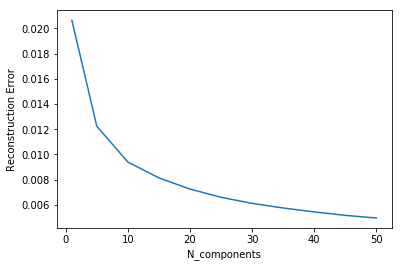

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(K, Loss)
plt.xlabel("N_components")
plt.ylabel("Reconstruction Error")
plt.show()
plt.savefig("4_reconstructed_error.png")